### <font color='blue'> PART I </font>
**EDA & Data Preprocessing on Google App Store Rating Dataset**

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

**Q.1) Import required libraries and read the dataset.**

In [3]:
df_app = pd.read_csv('App Data.csv')

In [4]:
df_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Q.2) Check the first few samples, shape, info of the data and try to familiarize yourself with different features.**

In [5]:
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df_app.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
df_app.shape

(10841, 13)

In [8]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Q.3)Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.**

In [9]:
df_app.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
df_app['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

**columns that need to be worked upon for model building.**
1. App
2. Category 
3. Rating 
4. Reviews
5. Size
6. Installs
7. Type
8. Price
9. Content Rating

**Q.4) Check if there are any duplicate records in the dataset? if any drop them.**

In [11]:
# Check for duplicates
duplicates = df_app.duplicated()
print(f"Number of duplicates:- {duplicates.sum()}")

Number of duplicates:- 483


In [12]:
# Drop the duplicates
df_app = df_app.drop_duplicates()

In [13]:
# Again check for duplicates 
df_app.duplicated().sum()

0

**Q.5) Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.**

In [14]:
# Check total number of 'Category'
total_category = df_app['Category'].nunique()
print(f"Total number of 'Catogory' is:- {total_category}")

Total number of 'Catogory' is:- 34


In [15]:
# Check the unique categories of the column 'Category'
unique_categories = df_app['Category'].unique()
print(f"Unique categories of the column 'Category':-\n {unique_categories}")

Unique categories of the column 'Category':-
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


1. We can see that from above output there is invalid category named **"1.9"** in the dataset,which is not a valid category name.
2. We can drop invalid category "1.9" by following code

In [16]:
# To drop invalid category
df_app = df_app.drop(index=df_app[df_app['Category'] == '1.9'].index)
print("Droped invalid category '1.9'")

Droped invalid category '1.9'


**Q.6) Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)**

In [17]:
#Check if there are missing values present in the column Rating
missing_rating = df_app['Rating'].isnull().any()
print(f"Missing Values present in 'Rating' column:- {missing_rating}")

Missing Values present in 'Rating' column:- True


In [18]:
# How many missing values are present in 'Rating' column
missvalues_rating = df_app['Rating'].isnull().sum()
print(f"Total number of missing values in 'Rating' column:-{missvalues_rating}")

Total number of missing values in 'Rating' column:-1465


In [19]:
# Drop the missing values in the Rating column
df_app.dropna(subset=['Rating'], inplace=True)

In [20]:
#To categorize ratings as high or low
rating_to_category = lambda x: 'High' if x > 3.5 else 'Low'

# Create a new column named 'Rating_category' 
df_app['Rating_category'] = df_app['Rating'].apply(rating_to_category)
df_app.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High


**Q.7) Check the distribution of the newly created column 'Rating_category' and comment on the distribution.**

In [21]:
# Check the distribution of the 'Rating_category' column
print("distribution of the 'Rating_category' column \n",df_app['Rating_category'].value_counts())

distribution of the 'Rating_category' column 
 High    8012
Low      880
Name: Rating_category, dtype: int64


1. Based on the output,High rating(8012) is higher than the low rating(880).
2. The distribution is imbalnced towards the **"High category"**.

**Q.8) Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)**

In [22]:
# Convert the 'Reviews' column to a numeric data type
df_app['Reviews'] = df_app['Reviews'].astype(float)

# Check the data type of the 'Reviews' column
print(df_app['Reviews'].dtype)

float64


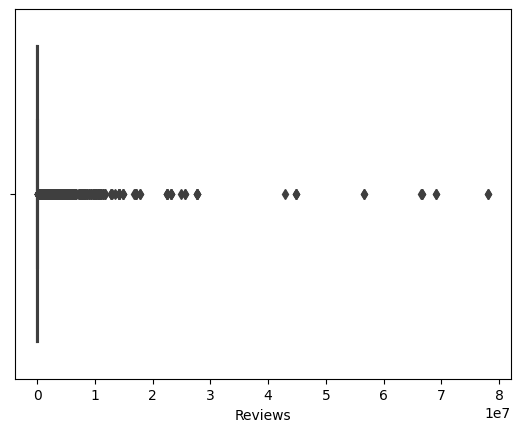

In [23]:
# Check for the presence of outliers using a boxplot
sns.boxplot(x=df_app['Reviews'])
plt.show()


In [24]:
df_app['Reviews'].describe()

count    8.892000e+03
mean     4.727764e+05
std      2.905052e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.714500e+03
75%      7.126675e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [25]:
# Apply a log transformation to handle outliers
df_app['Reviews'] = np.log(df_app['Reviews'])

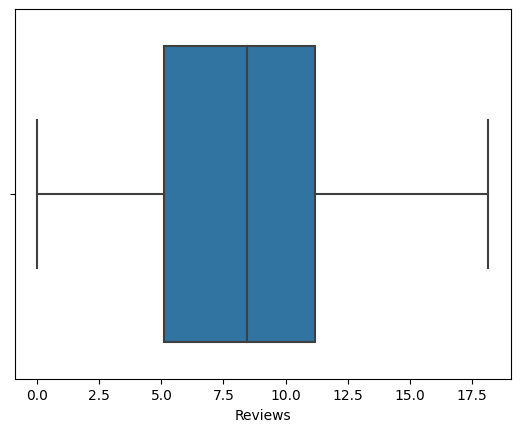

In [26]:
# Check for the presence of outliers after the transformation using a boxplot
sns.boxplot(x=df_app['Reviews'])
plt.show()

In [27]:
df_app['Reviews'].describe()

count    8892.000000
mean        8.234893
std         3.880200
min         0.000000
25%         5.099866
50%         8.458398
75%        11.174185
max        18.174247
Name: Reviews, dtype: float64

**Q.9) The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')**

In [28]:
# replace 'M' with '000000' and 'K' with '000' in the 'Size' column
df_app['Size'] = df_app['Size'].replace({'M': '000000', 'k': '000'}, regex=True)
df_app['Size']

0                  19000000
1                  14000000
2                 8.7000000
3                  25000000
4                 2.8000000
                ...        
10834             2.6000000
10836              53000000
10837             3.6000000
10839    Varies with device
10840              19000000
Name: Size, Length: 8892, dtype: object

In [29]:
# replace 'Varies with device' with NaN
df_app['Size'] = df_app['Size'].replace({'Varies with device': np.nan})
df_app['Size']

0         19000000
1         14000000
2        8.7000000
3         25000000
4        2.8000000
           ...    
10834    2.6000000
10836     53000000
10837    3.6000000
10839          NaN
10840     19000000
Name: Size, Length: 8892, dtype: object

In [30]:
# Check the null values
df_app['Size'].isnull().sum()

1468

In [31]:
# drop the rows where size is NaN
df_app.dropna(subset=['Size'], inplace=True)

In [32]:
# Check again for null values
df_app['Size'].isnull().sum()

0

In [33]:
# convert the 'Size' column to a numeric data type
df_app['Size'] = df_app['Size'].astype(float)

In [34]:
df_app['Size']

0        19000000.0
1        14000000.0
2               8.7
3        25000000.0
4               2.8
            ...    
10833      619000.0
10834           2.6
10836    53000000.0
10837           3.6
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

**Q.10) Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.**

In [35]:
df_app['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [36]:
# remove the "," and "+" signs from the 'Installs' column
df_app['Installs'] = df_app['Installs'].str.replace(',', '').str.replace('+', '')

df_app['Installs']

C:\Users\hp\AppData\Local\Temp\ipykernel_2560\1087551143.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_app['Installs'] = df_app['Installs'].str.replace(',', '').str.replace('+', '')


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: object

In [37]:
# Convert the data type to int
df_app['Installs'] = df_app['Installs'].astype(int)
df_app['Installs'].dtypes

dtype('int32')

**Q.11) Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.**

In [38]:
df_app['Price'].dtypes

dtype('O')

In [39]:
df_app['Price'] = df_app['Price'].str.replace('$','')
df_app['Price'].unique()

C:\Users\hp\AppData\Local\Temp\ipykernel_2560\1948196313.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_app['Price'] = df_app['Price'].str.replace('$','')


array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [40]:
df_app['Price'] = df_app['Price'].astype(float)
df_app['Price'].dtypes

dtype('float64')

**Q.12) Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)**

In [41]:
df_app.drop(columns=[ 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'],inplace=True)

In [42]:
df_app.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379508,8.7,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.874198,2.8,100000,Free,0.0,Everyone,High


In [43]:
df_app['Category'].nunique()

33

**Q.13) Encode the categorical columns.**

In [44]:
df_app_encoded = pd.get_dummies(df_app,columns=['Category','Type','Content Rating','Rating_category'])

In [45]:
df_app_encoded.head()

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating_category_High,Rating_category_Low
0,5.068904,19000000.0,10000,0.0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,6.874198,14000000.0,500000,0.0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,11.379508,8.7,5000000,0.0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,12.281384,25000000.0,50000000,0.0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,6.874198,2.8,100000,0.0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


**Q.14) Segregate the target and independent features (Hint: Use Rating_category as the target)**

- we can segregate the target and independent features as follows:
1. Target Feature: **'Rating_category'**
2. Independent Features: 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Rating_category'

**Q.15) Split the dataset into train and test.**

In [46]:
from sklearn.model_selection import train_test_split

# Split into target and independent variables
X = df_app_encoded.drop('Rating_category_High', axis=1)
y = df_app_encoded['Rating_category_High']

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [48]:
regression_model.score(X_train, y_train)

0.9999999999999996

**Q.16) Standardize the data, so that the values are within a particular range.**

In [49]:
from sklearn.preprocessing import StandardScaler

# instantiate StandardScaler
scaler = StandardScaler()

# fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [50]:
# create an instance of the model
model = LinearRegression()

# fit the model to the standardized training data
model.fit(X_train_scaled, y_train)

# predict on the standardized test data
y_pred = model.predict(X_test_scaled)

In [51]:
# This library expects the X and Y to be given in one single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating_category_Low,Rating_category_High
6799,5.062595,26000000.0,50000,0.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
428,12.158000,11000000.0,10000000,0.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3304,9.424484,5.3,1000000,0.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
5662,2.833213,14000000.0,1000,0.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3714,10.561784,89000000.0,1000000,0.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [52]:
regression_model.score(X_test, y_test)

0.9999999999999996